# Avaliação	de	Aprendizagem	de	Máquina	em	Data	Science/Data	Analytics

Luan Prates 08 setembro de 2018

## Questão 5
Carregue os dados contidos no arquivo “fruit_data_with_colors_miss.txt”.  - Utilize a estratégia de imputar os dados faltantes utilizando a média  dos demais dados.
Utilize o PCA para diminuir a dimensionalidade dos atributos para n_components=2 - Divida o conjunto de dados entre treino e teste. - Utilize o Classificador do KNN para realizar a classificação dos dados carregados, com o conjunto de atributos sendo constituído pela saída do PCA sobre as colunas “mass”, “width”, “height” e “color_score” e o rótulo sendo constituído pela coluna “fruit_label”. - Varie o parâmetro n_neighbors de 1 a 10 e mostre um gráfico contendo a diferença entre os scores obtidos no conjunto de treino para cada valor do parâmetro. - Varie o parâmetro n_neighbors de 1 a 10 e mostre um gráfico contendo a diferença entre os scores obtidos no conjunto de teste para cada valor do parâmetro. Justifique as diferenças apresentadas nos gráficos da questão anterior em relação aos obtidos nesta questão.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier


In [13]:
dataset = pd.read_table('datasets/fruit_data_with_colors_miss.txt', na_values=['?', '.'])

In [14]:
dataset.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,NaN,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [15]:
dataset.fillna(dataset.mean())
dataset['fruit_subtype'] = dataset['fruit_subtype'].fillna('missing')
dataset[['mass','width','height','color_score']] = dataset[['mass','width','height','color_score']].fillna(dataset.mean())

In [16]:
dataset.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.000000,8.4,7.3,0.55
1,1,apple,granny_smith,180.000000,8.0,6.8,0.59
2,1,apple,granny_smith,176.000000,7.4,7.2,0.60
3,2,mandarin,mandarin,164.448276,6.2,4.7,0.80
4,2,mandarin,mandarin,84.000000,6.0,4.6,0.79


In [17]:
dataset.shape

(59, 7)

In [18]:
dataset.groupby(dataset['fruit_name']).size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

In [19]:
valores_dados = dataset.values
X = valores_dados[:,3:7].astype(float)
X_scale = scale(X)
y = dataset['fruit_label']

In [20]:
pca = PCA(n_components=2)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)

In [21]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_pca, y, 
                                                        test_size = 0.20, 
                                                        random_state = 7)

In [22]:
n_visinhos = np.arange(1, 11, 1)

treino = []
teste = []
for n in n_visinhos:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_treino, y_treino)
    treino.append(model.score(X_treino, y_treino))
    teste.append(model.score(X_teste, y_teste))

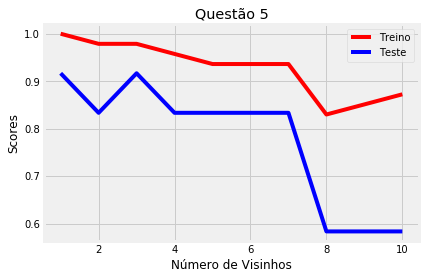

In [25]:
plt.plot(n_visinhos, treino, c='r', label='Treino')
plt.plot(n_visinhos, teste, c='b', label='Teste')
plt.title('Questão 5')
plt.ylabel('Scores')
plt.xlabel('Número de Visinhos')
plt.legend()
plt.savefig('imagens/Questão-5.png', transparent = True)
plt.show()